In [0]:
!pip install tensorflow-gpu==2.0.0-rc0

     |████████████████████████████████| 380.5MB 40kB/s 
     |████████████████████████████████| 501kB 25.9MB/s 
     |████████████████████████████████| 4.3MB 38.8MB/s 


In [0]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [0]:
import tensorflow as tf

In [0]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout

In [0]:
print(tf.__version__)

2.0.0-rc0


In [0]:
from tensorflow.keras.datasets import mnist

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [0]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [0]:
X_test.shape, y_test.shape

((10000, 28, 28), (10000,))

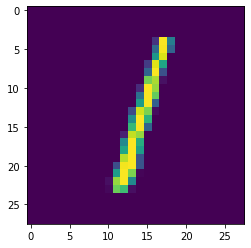

In [0]:
plt.imshow(X_test[2])

In [0]:
X_train.max()

255

In [0]:
X_train = X_train/255.0
X_test = X_test/255.0

In [0]:
X_train.max(), X_train.max()

(1.0, 1.0)

In [0]:
X_train = X_train.reshape(60000, 28,28,1)
X_test = X_test.reshape(10000,28,28,1)

In [0]:
X_train[0].shape

(28, 28, 1)

In [0]:
input_shape = X_train[0].shape

In [0]:
input_shape

(28, 28, 1)

In [0]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size=(3, 3), strides = 1, activation='relu', input_shape=input_shape))
model.add(Conv2D(filters = 64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(2, 2))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=10, activation='softmax'))

In [0]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)              

In [0]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [0]:
history = model.fit(X_train, y_train,batch_size=128, epochs=10, verbose=1, validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 163s 3ms/sample - loss: 0.2432 - accuracy: 0.9259 - val_loss: 0.0525 - val_accuracy: 0.9838
Epoch 2/10
60000/60000 [==============================] - 161s 3ms/sample - loss: 0.0859 - accuracy: 0.9741 - val_loss: 0.0431 - val_accuracy: 0.9856
Epoch 3/10
60000/60000 [==============================] - 161s 3ms/sample - loss: 0.0633 - accuracy: 0.9813 - val_loss: 0.0382 - val_accuracy: 0.9875
Epoch 4/10
60000/60000 [==============================] - 160s 3ms/sample - loss: 0.0543 - accuracy: 0.9839 - val_loss: 0.0333 - val_accuracy: 0.9895
Epoch 5/10
60000/60000 [==============================] - 161s 3ms/sample - loss: 0.0430 - accuracy: 0.9863 - val_loss: 0.0304 - val_accuracy: 0.9905
Epoch 6/10
60000/60000 [==============================] - 161s 3ms/sample - loss: 0.0405 - accuracy: 0.9871 - val_loss: 0.0297 - val_accuracy: 0.9906
Epoch 7/10
60000/60000 [==========================

In [0]:
 model.evaluate(X_test, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.03161592720109792, 0.9914]

In [0]:
history.history

{'accuracy': [0.9259,
  0.9741333,
  0.9812667,
  0.9839,
  0.9862667,
  0.9871,
  0.98833334,
  0.98973334,
  0.99013335,
  0.99161667],
 'loss': [0.2432311221520106,
  0.08590157112081846,
  0.06326742533842722,
  0.054349582019448284,
  0.042975936883687976,
  0.040501793902615706,
  0.03595200151366492,
  0.029766109222422045,
  0.030090528288359442,
  0.025971083722263574],
 'val_accuracy': [0.9838,
  0.9856,
  0.9875,
  0.9895,
  0.9905,
  0.9906,
  0.9913,
  0.9897,
  0.9908,
  0.9914],
 'val_loss': [0.052532457696646453,
  0.04314124964270741,
  0.03824924632487819,
  0.03331733447536826,
  0.030443162956740707,
  0.02972269174892572,
  0.027859258654806762,
  0.0329267422998455,
  0.027664646067046852,
  0.03161592722035421]}

In [0]:
def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

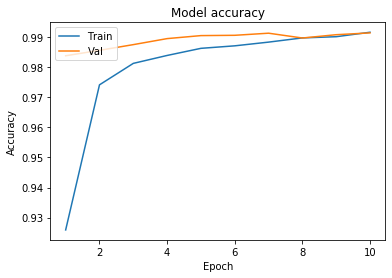

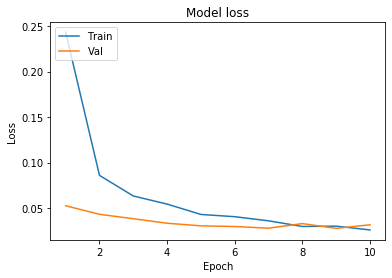

In [0]:
plot_learningCurve(history, 10)